In [51]:
# The aim of this analysis is to predict bar tips for a bartender based on a number of customer-related variables.
# Libraries are loaded first
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import sklearn
from matplotlib import pyplot as plt

df = pd.read_csv('tips.csv')

In [32]:
print(df.shape)

(244, 7)


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [34]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [35]:
# Lets check if there are duplicated values
print(df.duplicated().sum())
df = df.drop_duplicates(keep="first")

1


In [36]:
# Create dict for object type columns
print(set(df.sex))
print(set(df.smoker))
print(set(df.day))
print(set(df.time))
sex = {'Female' : 0, 'Male' : 1}
smoker = {'No' : 0, 'Yes' : 1}
day = {'Thur' : 0, 'Fri' : 1, 'Sat' : 2, 'Sun' : 3}
time = {'Lunch' : 0, 'Dinner' : 1}

{'Female', 'Male'}
{'Yes', 'No'}
{'Sat', 'Sun', 'Thur', 'Fri'}
{'Dinner', 'Lunch'}


In [37]:
df['sex'] = df['sex'].map(sex) 
df['smoker'] = df['smoker'].map(smoker) 
df['day'] = df['day'].map(day) 
df['time'] = df['time'].map(time) 
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [38]:
# A simple machine learning model will be created
# Regression target and the rest of the features are separated
X = df.drop("tip", axis=1)
y = df['tip']  

In [39]:
X.isna().sum()

total_bill    0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [82]:
# Model creation

from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 95% training y 5% test

reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)



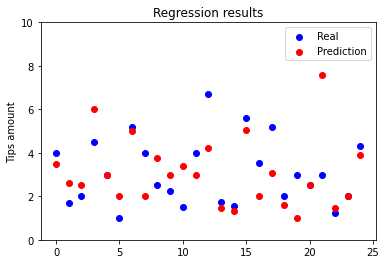

In [84]:
# Plot results

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.ylim([0, 10])
plt.ylabel("Tips amount")
plt.legend(['Real', 'Prediction'])
plt.title("Regression results")
plt.show()

In [85]:
# Save function 
def save_object(filename, object):
    with open(''+filename, 'wb') as file:
        pickle.dump(object, file)

In [86]:
save_object('model.pkl', reg_model)